In [1]:
import pandas as pd
import numpy as np
import os
path = 'D:\Term 1\EDA\Workspace'
os.chdir(path)

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline
from scipy.stats import chi2_contingency

In [3]:
hr_analytics = pd.read_csv('HR Analytics.csv')
hr_analytics.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,Sales,1,2,Life Sciences,1,2,Female,...,8,11,3,1,8,1,6,4,0,5
1,49,0,Travel_Frequently,Research & Development,8,1,Life Sciences,2,3,Male,...,1,23,4,4,10,3,10,7,1,7
2,37,1,Travel_Rarely,Research & Development,2,2,Other,4,4,Male,...,6,15,3,2,7,3,0,0,0,0
3,33,0,Travel_Frequently,Research & Development,3,4,Life Sciences,5,4,Female,...,1,11,3,3,8,3,8,7,3,0
4,27,0,Travel_Rarely,Research & Development,2,1,Medical,7,1,Male,...,9,12,3,4,6,3,2,2,2,2


In [4]:
## 1. What proportion of our staff are leaving??

prop = hr_analytics[(hr_analytics['Attrition'] == 1)]
prop_leave = (len(prop)/len(hr_analytics))*100
prop_leave

16.122448979591837

In [5]:
## 2. What role does gender and age play in this workplace

gender_department = hr_analytics.groupby(['Department','Gender']).size().reset_index()
gender_department = gender_department.rename(columns = {0:'count'})
gender_department_count = gender_department.pivot('Department','Gender','count')
gender_department_count

Gender,Female,Male
Department,,
Human Resources,20,43
Research & Development,379,582
Sales,189,257


In [6]:
chi2_contingency(gender_department_count)

(2.9644916359463056, 0.22712702921028263, 2, array([[ 25.2,  37.8],
        [384.4, 576.6],
        [178.4, 267.6]]))

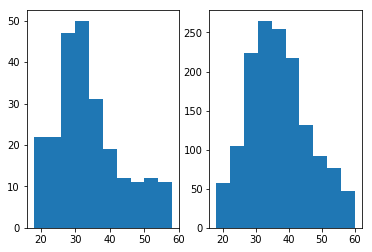

In [7]:
plt.subplot(1,2,1)
plt.hist(prop['Age'])

plt.subplot(1,2,2)
plt.hist(hr_analytics['Age'])
plt.show()

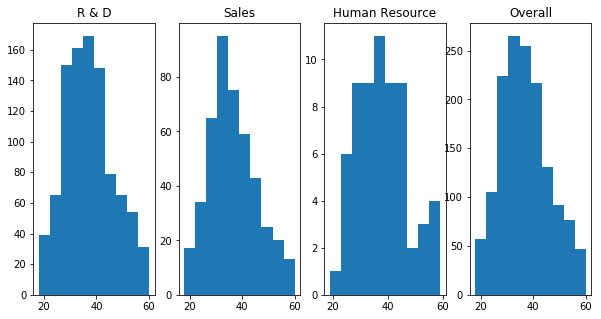

In [8]:
plt.rcParams['figure.figsize'] = (10,5)

Research = hr_analytics[(hr_analytics['Department']== 'Research & Development')]
plt.subplot(1,4,1)
plt.hist(Research['Age'])
plt.title("R & D")

Sales = hr_analytics[(hr_analytics['Department'] == 'Sales')]
plt.subplot(1,4,2)
plt.hist(Sales['Age'])
plt.title('Sales')

Human_Resource = hr_analytics[(hr_analytics['Department'] == 'Human Resources')]
plt.subplot(1,4,3)
plt.hist(Human_Resource['Age'])
plt.title('Human Resource')

plt.subplot(1,4,4)
plt.hist(hr_analytics['Age'])
plt.title('Overall')
plt.show()

## By histogram age does not depends on any department

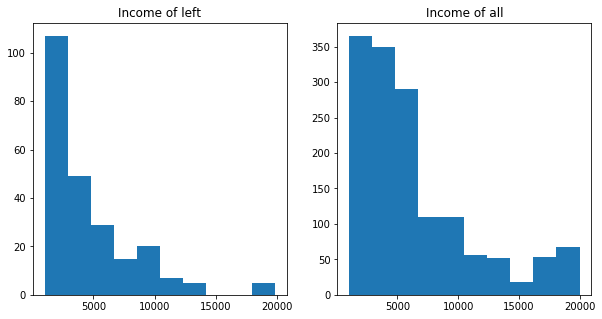

In [9]:
## 3. How much does income matter?
# H0 : Leaving the organization does not depends on income
# H1 : Leaving the organization does depends on income

plt.subplot(1,2,1)
plt.hist(prop['MonthlyIncome'])
plt.title('Income of left')

plt.subplot(1,2,2)
plt.hist(hr_analytics['MonthlyIncome'])
plt.title('Income of all')
plt.show()

## By histogram income will not depends on leaving the organiztion

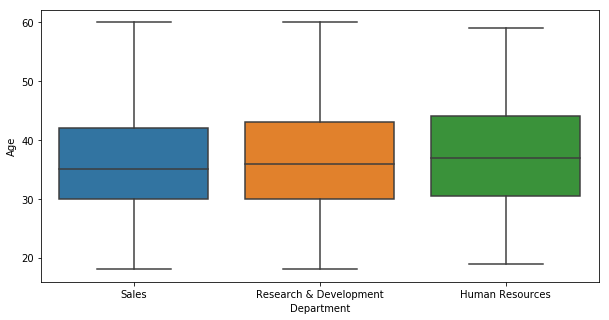

In [10]:
## 4. What is the average age of the employees in each department excluding the outliers?

import seaborn as sns
plt.rcParams['figure.figsize'] = [10,5]
sns.boxplot(data=hr_analytics, x='Department', y='Age')

In [11]:
avg_age = hr_analytics.groupby('Department')['Age'].mean().reset_index()
avg_age

,Department,Age
0,Human Resources,37.809524
1,Research & Development,37.042664
2,Sales,36.542601


In [12]:
## 5. Which education field has the highest attrition rate for the employees with less than 5 years of work experience
## and monthly salary between 2000 and 4000 USD.

education_total = hr_analytics[(hr_analytics['TotalWorkingYears'] < 5) & 
                               ((hr_analytics['MonthlyIncome'] >= 2000) & 
                                (hr_analytics['MonthlyIncome'] <= 4000))]
education_total = education_total.groupby('EducationField')['EmployeeNumber'].count().reset_index()
education_total = education_total[['EducationField','EmployeeNumber']]
education_total = education_total.rename(columns = {'EmployeeNumber':'No_of_employees'})

education_left = prop[(prop['TotalWorkingYears'] < 5) & 
                      ((prop['MonthlyIncome'] >= 2000) & 
                       (prop['MonthlyIncome'] <= 4000))]
education_left = education_left.groupby('EducationField')['EmployeeNumber'].count().reset_index()
education_left = education_left[['EducationField','EmployeeNumber']]
education_left = education_left.rename(columns = {'EmployeeNumber':'No_of_employees_left'})

education = pd.merge(education_total,education_left,on='EducationField')
education['rate'] = education['No_of_employees_left']/education['No_of_employees']
education = education.sort_values(by = 'rate',ascending = False)
education

,EducationField,No_of_employees,No_of_employees_left,rate
0,Human Resources,4,3,0.750000
2,Marketing,15,8,0.533333
5,Technical Degree,22,9,0.409091
1,Life Sciences,72,19,0.263889
3,Medical,46,12,0.260870
4,Other,8,2,0.250000


<BarContainer object of 6 artists>

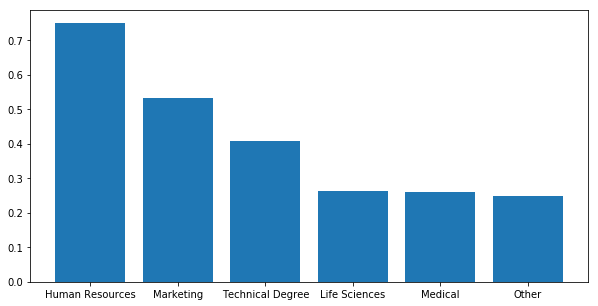

In [13]:
plt.bar(education['EducationField'],education['rate'])

In [14]:
## 6. What is the average salary hike for the employees with work experience between 8 years to 10 years

avg_salary = hr_analytics[(hr_analytics['TotalWorkingYears'] >= 8) & (hr_analytics['TotalWorkingYears'] <= 10)]
avg_salary_hike = avg_salary['PercentSalaryHike'].mean()
avg_salary_hike

15.266832917705736

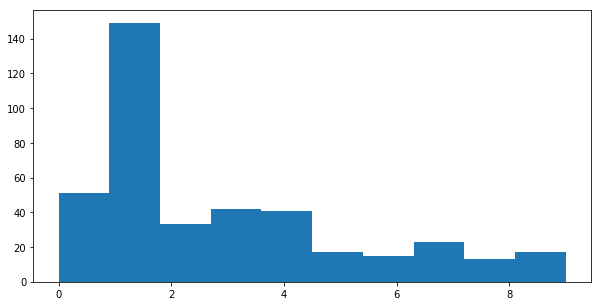

In [15]:
## 7. Is the “number of companies worked” normally distributed for the employees with work experience 
## between 8 years and 10 years.

Employee_8_to_10 = hr_analytics[(hr_analytics['TotalWorkingYears'] >= 8) & (hr_analytics['TotalWorkingYears'] <= 10)]

plt.hist(Employee_8_to_10['NumCompaniesWorked'])
plt.show()

In [24]:
## 8. Divided the whole data into two groups – 
## Group1: people with monthly salary more than the average salary of all employees. 
## Group2 : people with monthly salary less than the average salary of all employees. 
## For each group analysis the attrition rate in each Job Role. 
## Find the Job role which has the highest attrition rate gap across the group.  

avg_sal = hr_analytics['MonthlyIncome'].mean()
hr_analytics['Group'] = 0
for i in range(len(hr_analytics)):
    if (hr_analytics.loc[i,'MonthlyIncome'] > avg_sal) :
        hr_analytics.loc[i,'Group'] = 'Group1'
    elif (hr_analytics.loc[i,'MonthlyIncome'] < avg_sal) :
        hr_analytics.loc[i,'Group'] = 'Group2'
hr_analytics.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Group
0,41,1,Travel_Rarely,Sales,1,2,Life Sciences,1,2,Female,...,11,3,1,8,1,6,4,0,5,Group2
1,49,0,Travel_Frequently,Research & Development,8,1,Life Sciences,2,3,Male,...,23,4,4,10,3,10,7,1,7,Group2
2,37,1,Travel_Rarely,Research & Development,2,2,Other,4,4,Male,...,15,3,2,7,3,0,0,0,0,Group2
3,33,0,Travel_Frequently,Research & Development,3,4,Life Sciences,5,4,Female,...,11,3,3,8,3,8,7,3,0,Group2
4,27,0,Travel_Rarely,Research & Development,2,1,Medical,7,1,Male,...,12,3,4,6,3,2,2,2,2,Group2


In [17]:
attrition_jobrole_rate_all = hr_analytics.groupby(['Group','JobRole'])['EmployeeNumber'].count().reset_index()
attrition_jobrole_rate_all = attrition_jobrole_rate_all.rename(columns = {'EmployeeNumber':'No_of_Emp'})

left_emp = hr_analytics[(hr_analytics['Attrition'] == 1)]
attrition_jobrole_rate_left = left_emp.groupby(['Group','JobRole'])['EmployeeNumber'].count().reset_index()
attrition_jobrole_rate_left = attrition_jobrole_rate_left.rename(columns = {'EmployeeNumber':'No_Emp_left'})

attrition_jobrole_rate = pd.merge(attrition_jobrole_rate_all,attrition_jobrole_rate_left, on=['Group','JobRole'])
attrition_jobrole_rate['rate'] = attrition_jobrole_rate['No_Emp_left']/attrition_jobrole_rate['No_of_Emp']
attrition_jobrole_rate

,Group,JobRole,No_of_Emp,No_Emp_left,rate
0,Group1,Healthcare Representative,77,8,0.103896
1,Group1,Human Resources,6,2,0.333333
2,Group1,Manager,102,5,0.049020
3,Group1,Manufacturing Director,70,5,0.071429
4,Group1,Research Director,80,2,0.025000
5,Group1,Sales Executive,149,30,0.201342
6,Group2,Healthcare Representative,54,1,0.018519
7,Group2,Human Resources,46,10,0.217391
8,Group2,Laboratory Technician,256,62,0.242188
9,Group2,Manufacturing Director,75,5,0.066667


In [18]:
attrition_jobrole_rate = attrition_jobrole_rate.pivot('JobRole','Group','rate')
attrition_jobrole_rate

Group,Group1,Group2
JobRole,,
Healthcare Representative,0.103896,0.018519
Human Resources,0.333333,0.217391
Laboratory Technician,NaN,0.242188
Manager,0.049020,NaN
Manufacturing Director,0.071429,0.066667
Research Director,0.025000,NaN
Research Scientist,NaN,0.163763
Sales Executive,0.201342,0.152542
Sales Representative,NaN,0.402439


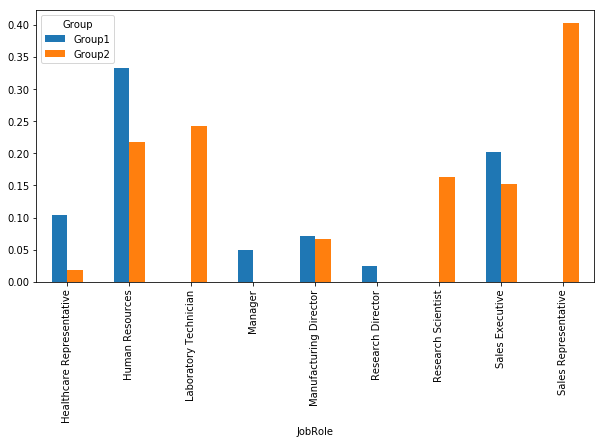

In [19]:
attrition_jobrole_rate.plot(kind = 'bar')

In [20]:
## 9. How does Relationship Satisfaction affect termination?

relation_termination = prop.groupby(['RelationshipSatisfaction'])['EmployeeNumber'].count().reset_index()
for i in range(len(relation_termination)):
    if (relation_termination.loc[i,'RelationshipSatisfaction'] == 1) :
        relation_termination.loc[i,'RelationshipSatisfaction'] = 'Low'
    elif relation_termination.loc[i,'RelationshipSatisfaction'] == 2 :
        relation_termination.loc[i,'RelationshipSatisfaction'] = 'medium'
    elif relation_termination.loc[i,'RelationshipSatisfaction'] == 3:
        relation_termination.loc[i,'RelationshipSatisfaction'] = 'high'
    elif relation_termination.loc[i,'RelationshipSatisfaction'] == 4:
        relation_termination.loc[i,'RelationshipSatisfaction'] = 'very high'
    
relation_termination

,RelationshipSatisfaction,EmployeeNumber
0,Low,57
1,medium,45
2,high,71
3,very high,64


<BarContainer object of 4 artists>

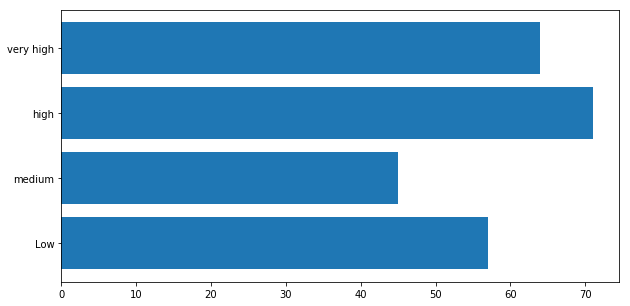

In [21]:
plt.barh(relation_termination['RelationshipSatisfaction'],relation_termination['EmployeeNumber'])

In [22]:
## 10. Which Education field is more likely to leave?

education_total = hr_analytics.groupby('EducationField')['EmployeeNumber'].count().reset_index()
education_total = education_total[['EducationField','EmployeeNumber']]
education_total = education_total.rename(columns = {'EmployeeNumber':'No_of_employees'})

education_left = prop.groupby('EducationField')['EmployeeNumber'].count().reset_index()
education_left = education_left[['EducationField','EmployeeNumber']]
education_left = education_left.rename(columns = {'EmployeeNumber':'No_of_employees_left'})

education = pd.merge(education_total,education_left,on='EducationField')
education['rate'] = education['No_of_employees_left']/education['No_of_employees']
education = education.sort_values(by = 'rate',ascending = False)
education

,EducationField,No_of_employees,No_of_employees_left,rate
0,Human Resources,27,7,0.259259
5,Technical Degree,132,32,0.242424
2,Marketing,159,35,0.220126
1,Life Sciences,606,89,0.146865
3,Medical,464,63,0.135776
4,Other,82,11,0.134146


<BarContainer object of 6 artists>

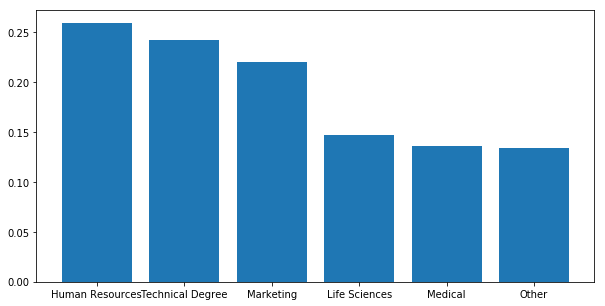

In [23]:
plt.bar(education['EducationField'],education['rate'])